[View in Colaboratory](https://colab.research.google.com/github/telecombcn-dl/2018-dlai/blob/master/2_1_multiclass_classification_MLP_CNNs.ipynb)

# Multiclass Classification 


----

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you become a machine learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:


In [2]:
import numpy as np
np.random.seed(123)
import keras
keras.__version__

'2.1.6'

In [3]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step



train_images and train_labels form the "training set", the data that the model will learn from. The model will then be tested on the "test set", test_images and test_labels. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

In [4]:
train_images.shape

(60000, 28, 28)

And now let's check the labels:



In [5]:
train_labels.shape

(60000,)

And now let's look at the kind of images we are dealing with:

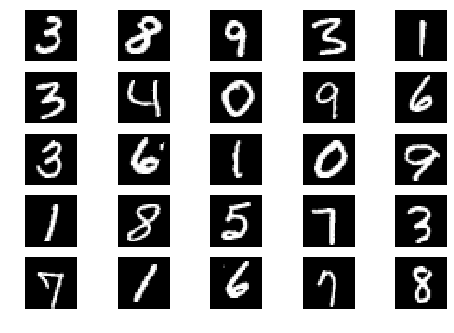

In [6]:
import matplotlib.pyplot as plt
import random

def plot_samples(X_train,N=5):

    '''
    Plots N**2 randomly selected images from training data in a NxN grid
    '''
    ps = random.sample(range(0,X_train.shape[0]), N**2)

    f, axarr = plt.subplots(N, N)

    p = 0
    for i in range(N):
        for j in range(N):
            if len(X_train.shape) == 3:
                axarr[i,j].imshow(X_train[ps[p]],cmap='gray')
            else:
              im = X_train[ps[p]]
              axarr[i,j].imshow(im)
            axarr[i,j].axis('off')
            p+=1
    plt.show()

plot_samples(train_images)

# Training a Multi-Layer Perceptron (MLP)



Our workflow will be as follow: first we will train our neural network with the training data, train_images and train_labels. The network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for test_images, and we will verify if these predictions match the labels from test_labels.

For the time being, we will use a very simple network:



In [0]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))



Here our network consists of a sequence of two Dense layers, which are densely-connected (also called "fully-connected") neural layers. The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

To make our network ready for training, we need to pick three more things, as part of "compilation" step:


*    **A loss function**: this is how the network will be able to measure how good a job works on its training data, and thus how it will be able to steer itself in the right direction.
*   **An optimizer**: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
*   ** Metrics to monitor during training and testing**. Here we will only care about accuracy (the fraction of the images that were correctly classified).

Now we can check which is the arhitecture of the network, and the number of parameters of each layer:






In [8]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in the [0, 1] interval. Previously, our training images for instance were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255



We also need to categorically encode the labels, so that a sample with a label N...

In [11]:
train_labels[0]

5

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


Is represented by a vector of all 0s and a 1 in the Nth position 

In [13]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

We are now ready to train our network, which in Keras is done via a call to the fit method of the network: we "fit" the model to its training data.

In [14]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.2588 - acc: 0.9250
Epoch 2/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.1043 - acc: 0.9690
Epoch 3/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.0685 - acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.0497 - acc: 0.9845
Epoch 5/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.0367 - acc: 0.9889


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:


In [15]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 61us/step


In [16]:
print('test_acc:', test_acc)

test_acc: 0.9804


Our test set accuracy turns out to be around 98% -- that's quite a bit lower than the training set accuracy (take into account that this dataset is really simple - state of the art methods can reach 99.8%). This gap between training accuracy and test accuracy is an example of "overfitting", the fact that machine learning models tend to perform worse on new data than on their training data. Overfitting will be a central topic in the next session.

# Training a Convolutional Neural Network (CNN)

We have trained a network using fully connected layers, but in the theory we have learned that when dealing with images, Convolutional Neural Networks (CNNs) are more convenient, so in this second part of the session, we are going to train a convolutional neural network for multiclass classification. 

The following lines show what a basic convnet looks like. It's a stack of Conv2D and MaxPooling2D layers. We'll see in a minute what they do concretely. Importantly, a convnet takes as input tensors of shape (image_height, image_width, image_channels) (not including the batch dimension). In our case, we will configure our convnet to process inputs of size (28, 28, 1), which is the format of MNIST images. We do this via passing the argument input_shape=(28, 28, 1) to our first layer.

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of our convnet so far:

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


You can see above that the output of every `Conv2D` and `MaxPooling2D` layer is a 3D tensor of shape `(height, width, channels)`. The width 
and height dimensions tend to shrink as we go deeper in the network. The number of channels is controlled by the first argument passed to 
the `Conv2D` layers (e.g. 32 or 64).

The next step would be to feed our last output tensor (of shape `(3, 3, 64)`) into a densely-connected classifier network like those you are 
already familiar with: a stack of `Dense` layers. These classifiers process vectors, which are 1D, whereas our current output is a 3D tensor. 
So first, we will have to flatten our 3D outputs to 1D, and then add a few `Dense` layers on top:

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network looks like:

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                36928     
__________

As you can see, our `(3, 3, 64)` outputs were flattened into vectors of shape `(576,)`, before going through two `Dense` layers.

Now, let's train our convnet on the MNIST digits. 

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [22]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 11s 191us/step - loss: 0.1806 - acc: 0.9441
Epoch 2/5
60000/60000 [==============================] - 11s 175us/step - loss: 0.0496 - acc: 0.9849
Epoch 3/5
47104/60000 [======================>.......] - ETA: 2s - loss: 0.0341 - acc: 0.9896

60000/60000 [==============================] - 10s 175us/step - loss: 0.0335 - acc: 0.9898
Epoch 4/5
60000/60000 [==============================] - 11s 176us/step - loss: 0.0252 - acc: 0.9919
Epoch 5/5
60000/60000 [==============================] - 11s 175us/step - loss: 0.0212 - acc: 0.9937


Let's evaluate the model on the test data:

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 101us/step


In [24]:
test_acc

0.9916

While our densely-connected network we had a test accuracy of 97.8%, our basic convnet has a test accuracy of 99.3%: we  decreased our error rate by 68% (relative).